<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Global Coffee Health Dataset 

Amanda Renata / 0706022310010

In [209]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [211]:
print(df.columns.tolist())

['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

from info we can see that 1 column has a lot of nulls

In [213]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [214]:
df = df.drop(['ID'], axis=1)

because no need for id in this case

In [215]:
df['Health_Issues'].value_counts()

Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

Checking the health issue data

In [216]:
df['Health_Issues'] = df['Health_Issues'].fillna('None')

because health issue has 4 categories and the none was read as null so now i change it back so the data will be accurate

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Country                  10000 non-null  object 
 3   Coffee_Intake            10000 non-null  float64
 4   Caffeine_mg              10000 non-null  float64
 5   Sleep_Hours              10000 non-null  float64
 6   Sleep_Quality            10000 non-null  object 
 7   BMI                      10000 non-null  float64
 8   Heart_Rate               10000 non-null  int64  
 9   Stress_Level             10000 non-null  object 
 10  Physical_Activity_Hours  10000 non-null  float64
 11  Health_Issues            10000 non-null  object 
 12  Occupation               10000 non-null  object 
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

now all the data in df can be used

3 visualizations and the interpretation 

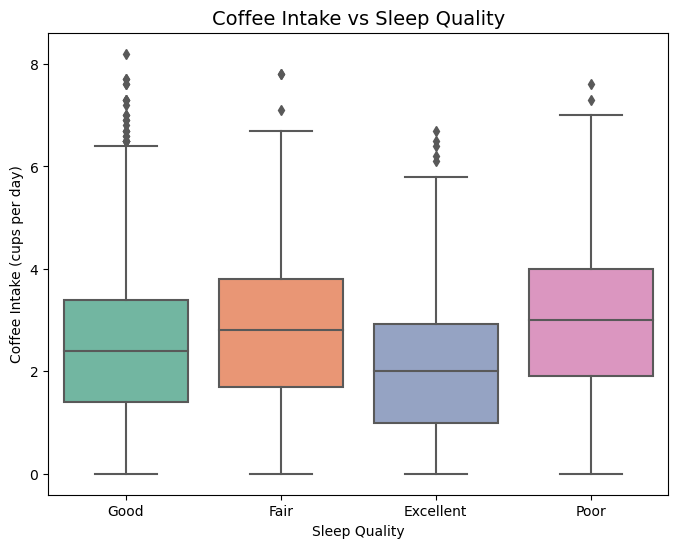

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Sleep_Quality', y='Coffee_Intake', data=df, palette="Set2")

plt.title("Coffee Intake vs Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality")
plt.ylabel("Coffee Intake (cups per day)")
plt.show()


We can see that people who rate their sleep quality as "Excellent" have the lowest median coffee intake, whereas the people who rate their sleep as "Poor" has the highest median coffee intake. Meaning coffee makes your sleep worse

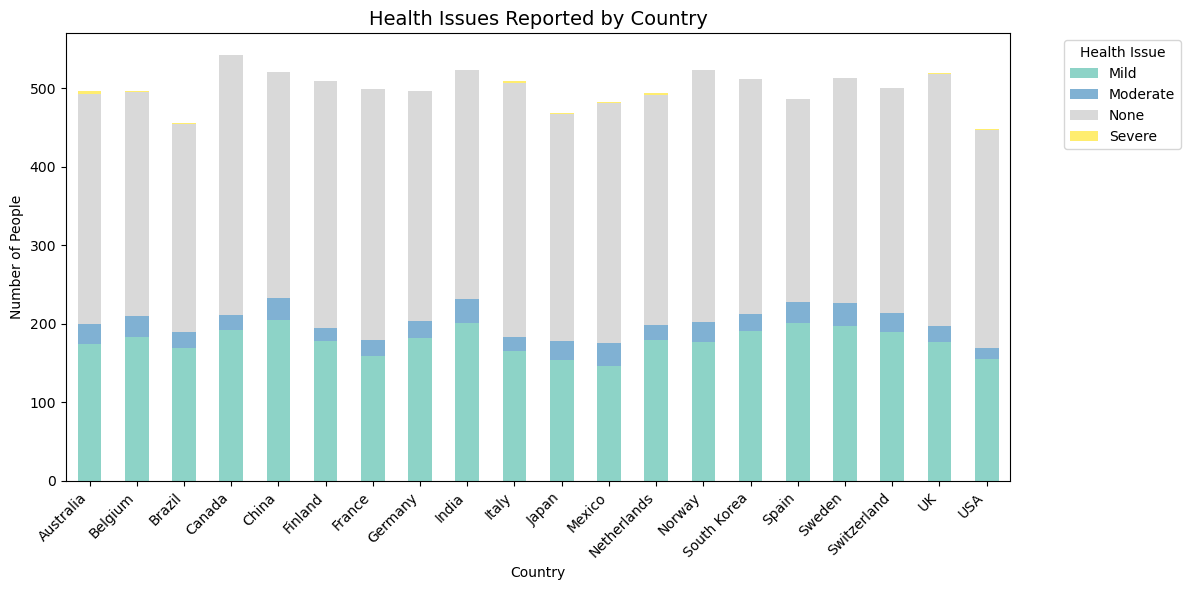

In [219]:
health_counts = df.groupby(["Country", "Health_Issues"]).size().unstack(fill_value=0)
health_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set3")

plt.title("Health Issues Reported by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Number of People")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Health Issue", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the chart above we can see that health issues reported in each country is almost about the same, but we can see that a few countries dont have severe cases where as some do. The countries that have severe cases are Australia, Belgium, Brazil, Italy, Japan, Mexico, Netherlands, Norway, UK and USA. These can be a couple of reasons such as the food quality, or health care system, or even the population size

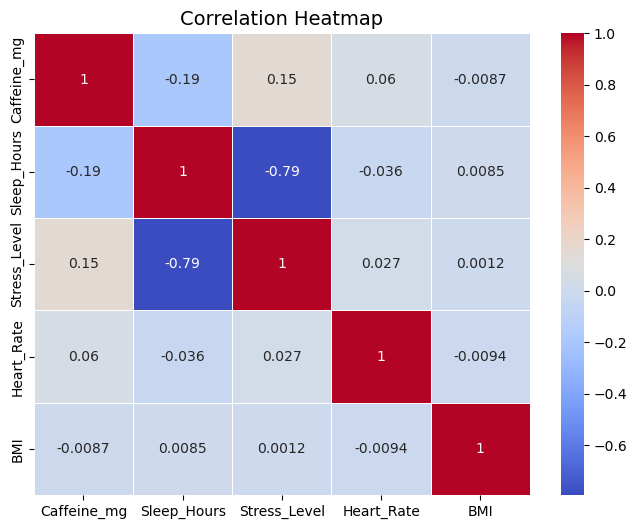

In [248]:
corr_cols = ["Caffeine_mg", "Sleep_Hours", "Stress_Level", "Heart_Rate", "BMI"]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

From the heatmap, we can see that the one with the highest correlation is sleep hour with stress level with a -0.79. Meaning people who sleep more hours tend to have lower stress levels.

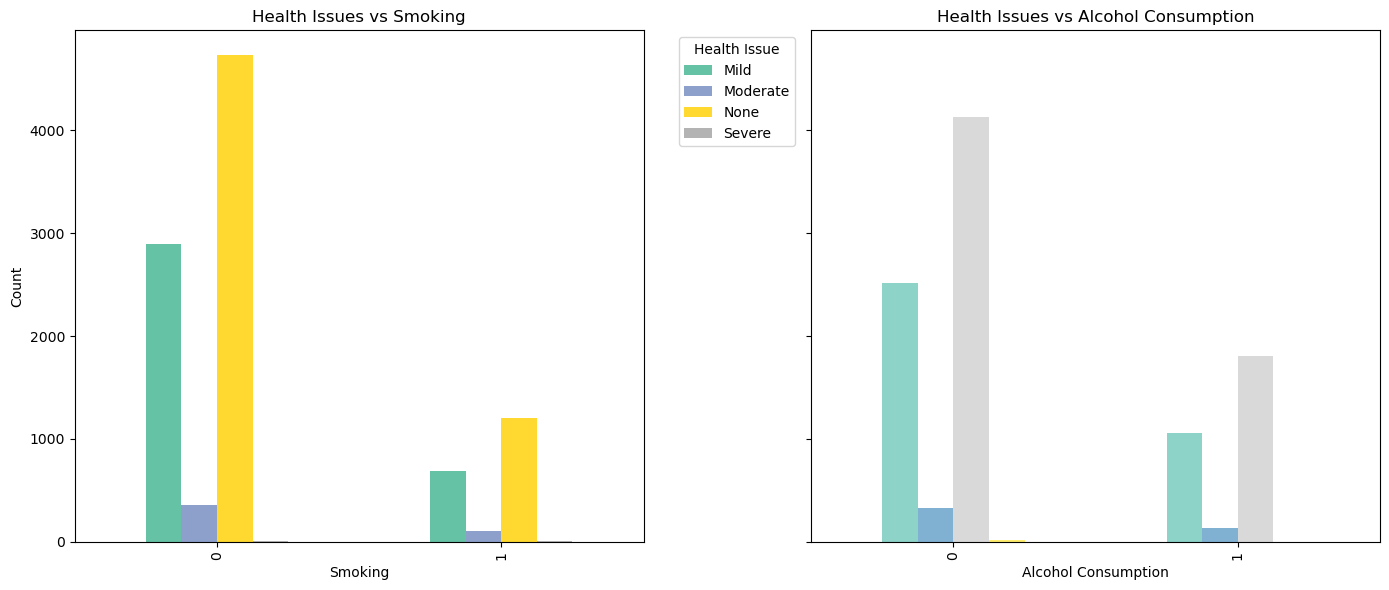

In [222]:
smoking_health = df.groupby(["Smoking", "Health_Issues"]).size().unstack(fill_value=0)
alcohol_health = df.groupby(["Alcohol_Consumption", "Health_Issues"]).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

smoking_health.plot(kind="bar", ax=axes[0], colormap="Set2")
axes[0].set_title("Health Issues vs Smoking")
axes[0].set_xlabel("Smoking")
axes[0].set_ylabel("Count")
axes[0].legend(title="Health Issue", bbox_to_anchor=(1.05, 1), loc='upper left')

alcohol_health.plot(kind="bar", ax=axes[1], colormap="Set3")
axes[1].set_title("Health Issues vs Alcohol Consumption")
axes[1].set_xlabel("Alcohol Consumption")
axes[1].legend().set_visible(False) 

plt.tight_layout()
plt.show()

From the Bar Chart Above we can see that people who dont smoke mostly dont have health issues, with a few having MILD health issues.
Same with people who do smoke, so we can conclude that smoking doesn't really effect your health.

The same can be said for alhohol consumption and health issues, that it has no real effect.

### Encode categorical variables


Now, I will encode the categorical variables.

In [223]:
for column in ['Gender', 'Country','Sleep_Quality','Stress_Level','Health_Issues','Occupation']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']


First Check which columns are categorical

In [224]:
# Encoding for ordinal column
Gender_map = {'Male': 2, 'Female': 1, 'Other': 0}
Country_map = {'Germany': 4, 'Brazil': 3, 'Spain': 2, 'Mexico': 1,'France': 0, 'Canada': 5, 'UK': 6, 'Switzerland': 7, 'Netherlands': 8, 'Italy': 9, 'China': 10, 'Japan': 11,'Belgium': 12, 'Finland': 13, 'UK': 14, 'Australia': 15,'USA': 16,'Sweden': 17, 'India': 18, 'Norway': 19, 'South Korea': 20}
Sleep_Quality_map = {'Excellent': 3, 'Good': 2, 'Fair': 1, 'Poor': 0}
Stress_Level_map = {'Low': 0, 'Medium': 1, 'High': 2}
Health_Issues_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
Occupation_map = {'Other': 0, 'Service': 2, 'Office': 3, 'Student': 4, 'Healthcare': 1}

df['Gender'] = df['Gender'].map(Gender_map)
df['Country'] = df['Country'].map(Country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(Sleep_Quality_map)
df['Stress_Level'] = df['Stress_Level'].map(Stress_Level_map)
df['Health_Issues'] = df['Health_Issues'].map(Health_Issues_map)
df['Occupation'] = df['Occupation'].map(Occupation_map)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
6915,19,1,11,4.2,402.1,4.9,0,17.3,69,2,2.6,1,1,0,0
1226,35,1,2,2.0,187.4,7.9,2,15.0,67,0,2.5,0,2,1,0
2492,29,2,18,1.0,92.6,8.1,3,27.7,73,0,12.5,0,1,1,0
9709,22,2,9,0.0,0.0,9.2,3,20.0,69,0,2.7,0,4,0,1
4699,29,0,8,2.7,251.9,5.1,1,25.5,70,1,11.7,1,3,1,0


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [225]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [226]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,2,4,3.5,328.1,7.5,2,24.9,78,0,14.5,0,0,0
1,33,2,4,1.0,94.1,6.2,2,20.0,67,0,11.0,2,0,0
2,42,2,3,5.3,503.7,5.9,1,22.7,59,1,11.2,3,0,0
3,53,2,4,2.6,249.2,7.3,2,24.7,71,0,6.6,0,0,0
4,32,1,2,3.1,298.0,5.3,1,24.1,76,1,8.5,4,0,1


In [227]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Health_Issues, dtype: int64

# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [228]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [229]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [230]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,2,2,4.3,405.6,5.4,1,18.0,86,1,2.4,2,0,1
1561,26,2,18,0.0,0.0,5.5,1,28.3,75,1,10.8,0,0,0
1670,32,2,20,2.8,268.1,7.3,2,27.4,69,0,8.6,3,0,0
6087,18,2,20,2.2,208.6,8.1,3,16.3,83,0,8.9,0,0,1
6669,43,1,14,2.6,251.1,9.4,3,25.4,68,0,3.4,3,0,0


In [231]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,2,19,2.6,245.9,6.7,2,30.1,76,0,1.9,2,0,1
4684,22,1,1,3.1,293.1,7.6,2,20.4,69,0,5.0,2,0,0
1731,30,2,15,3.9,372.4,6.4,2,27.5,75,0,13.8,3,0,0
4742,35,2,4,1.0,92.5,5.3,1,23.1,71,1,2.4,2,0,0
4521,47,2,9,1.3,119.0,6.9,2,28.4,64,0,9.6,3,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [232]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [233]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [234]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [235]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 1.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 5040\nvalue = [4723, 317, 0, 0]')

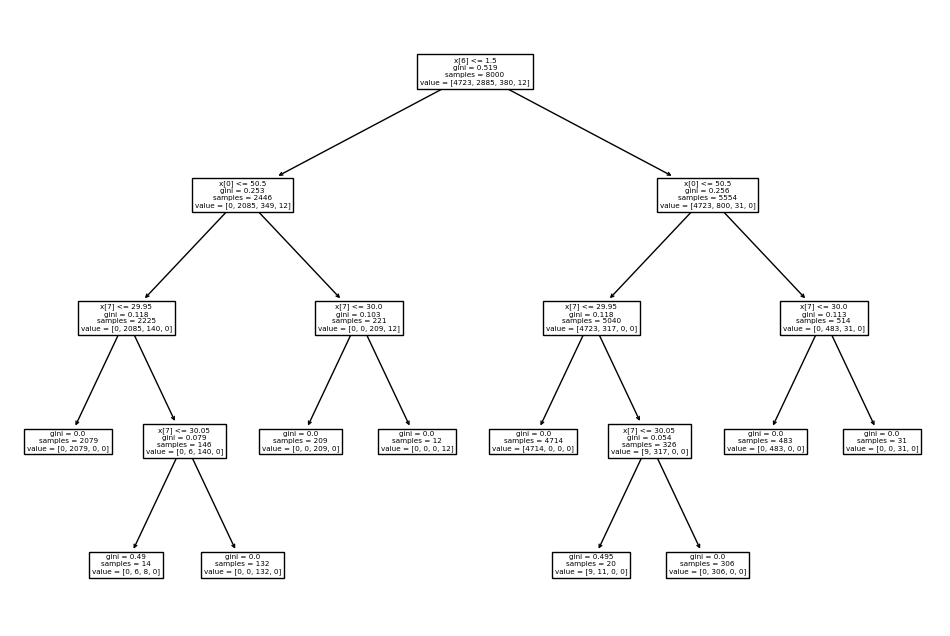

In [236]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [237]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [238]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [239]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 1.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4714\nvalue = [4714, 0, 0, 0]'),
 Text(0.6875, 0.125, 'en

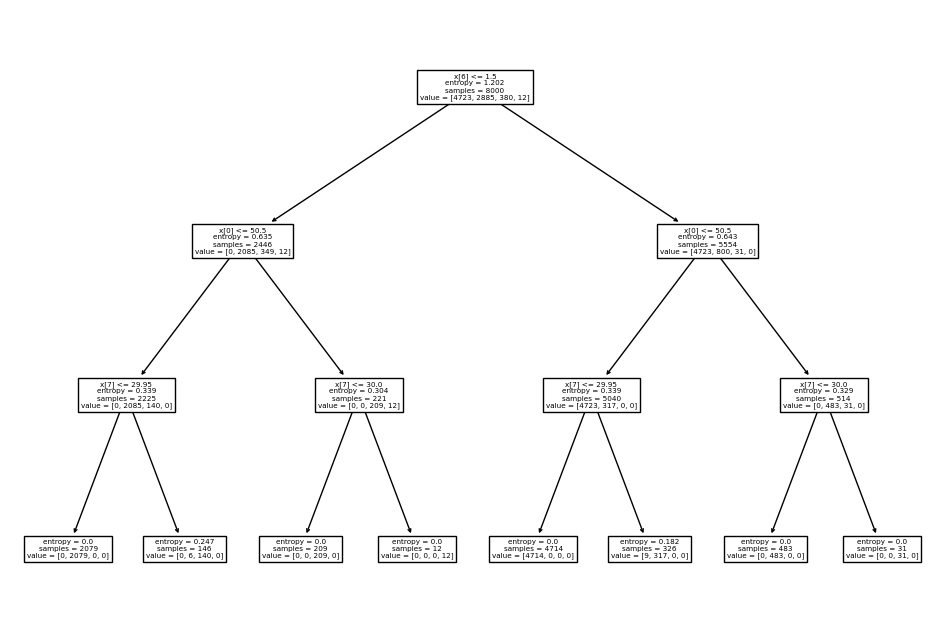

In [240]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [241]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [242]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [243]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [244]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [245]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [246]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.88      0.70      0.78       694
           2       0.71      0.14      0.24        83
           3       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



From the results of gini, entropy and NV we can see that the one that did the worst is NV with a prediction accuracy of 0.85 where as both gini and entropy did a 0.99

In [247]:
# Make a prediction with the gini index model

input_data = {
    'Age': 28,
    'Gender': Gender_map['Male'],
    'Country': Country_map['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': Sleep_Quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': Stress_Level_map['High'],
    'Physical_Activity_Hours': 2,
    'Occupation': Occupation_map['Student'],
    'Smoking': 1,
    'Alcohol_Consumption': 1 
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])


# reverse dictionary
inverse_prediction_gini = {v:k for k,v in Health_Issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 1
The predicted class for the given input using the gini index model is: Mild


I use gini because both my gini and entropy prediction results are the same, so either one is fine